# Plot the model outputs

In [4]:
import pandas as pd
from simpler_mpl import set_common_mpl_styles
from matplotlib.ticker import FormatStrFormatter, StrMethodFormatter
import matplotlib.pyplot as plt

In [14]:
df_comparison_dummy

,churn_proba_pos,cumsum_value_churn
0,0.386489,0
1,0.386489,100
2,0.386489,100
3,0.389345,100
4,0.386489,200
...,...,...
49995,0.025626,4159600
49996,0.146960,4159700
49997,0.146960,4159700
49998,0.145459,4159800


In [15]:
uplift_result_file = "df_comparison_uplift.pickle"
df_comparison_uplift = pd.read_pickle(uplift_result_file)
churn_result_file = "df_comparison_churn.pickle"
df_comparison_churn = pd.read_pickle(churn_result_file)
dummy_result_file = "df_comparison_dummy.pickle"
df_comparison_dummy = pd.read_pickle(dummy_result_file)

df_to_plot = pd.concat((df_comparison_dummy, df_comparison_churn, df_comparison_uplift), axis=1)
df_to_plot.iloc[100][['cumsum_value_dummy', 'cumsum_value_churn', 'cumsum_value_uplift']]

cumsum_value_dummy     8100.0
cumsum_value_churn     5300.0
cumsum_value_uplift    9500.0
Name: 100, dtype: float64

In [16]:
df_to_plot.shape

(50000, 6)

In [17]:
df_to_plot.sample(5).sort_index()

,dummy_proba_pos,cumsum_value_dummy,churn_proba_pos,cumsum_value_churn,uplift_diff_t_c,cumsum_value_uplift
503,0.16582,43300,0.386489,29800,-0.315099,47400
1823,0.16582,155500,0.389345,113500,-0.253080,157200
7792,0.16582,653800,0.389345,500300,-0.132996,728400
43927,0.16582,3655800,0.145459,3632500,0.087855,3743000
44652,0.16582,3715800,0.146960,3693600,0.087855,3797000


In [18]:
df_to_plot['cumsum_value_dummy'] = df_to_plot['cumsum_value_dummy'] / 1_000_000
df_to_plot['cumsum_value_churn'] = df_to_plot['cumsum_value_churn'] / 1_000_000
df_to_plot['cumsum_value_uplift'] = df_to_plot['cumsum_value_uplift'] / 1_000_000

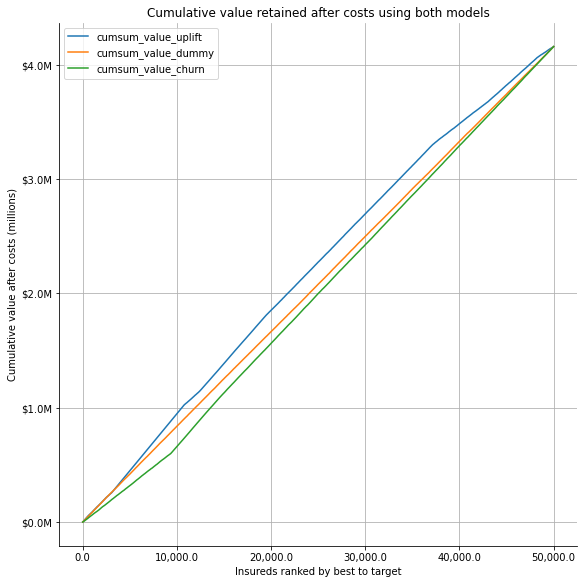

In [33]:
fig, ax = plt.subplots(constrained_layout=True, figsize=(8, 8))
df_to_plot[:50_000].plot(y=['cumsum_value_uplift', 'cumsum_value_dummy', 'cumsum_value_churn'], ax=ax);
title = "Cumulative value retained after costs using both models"
set_common_mpl_styles(ax, grid_axis="both", xlabel="Insureds ranked by best to target", 
                      ylabel="Cumulative value after costs (millions)", title=title)
ax.xaxis.set_major_formatter(StrMethodFormatter('{x:,}'))
ax.yaxis.set_major_formatter(StrMethodFormatter('${x:}M'))
#plt.draw()
#set_commas(ax, x_axis=True, y_axis=True)

In [20]:
df_to_plot

,dummy_proba_pos,cumsum_value_dummy,churn_proba_pos,cumsum_value_churn,uplift_diff_t_c,cumsum_value_uplift
0,0.16582,0.0001,0.386489,0.0000,-0.315099,0.0001
1,0.16582,0.0002,0.386489,0.0001,-0.315099,0.0002
2,0.16582,0.0003,0.386489,0.0001,-0.315099,0.0003
3,0.16582,0.0004,0.389345,0.0001,-0.315099,0.0004
4,0.16582,0.0005,0.386489,0.0002,-0.315099,0.0005
...,...,...,...,...,...,...
49995,0.16582,4.1597,0.025626,4.1596,0.237179,4.1598
49996,0.16582,4.1597,0.146960,4.1597,0.237179,4.1598
49997,0.16582,4.1598,0.146960,4.1597,0.237179,4.1598
49998,0.16582,4.1598,0.145459,4.1598,0.237179,4.1598


In [32]:
row_with_minimum_uplift_effect = (0 - df_to_plot['uplift_diff_t_c'].abs()).idxmax()
print(f"At row {row_with_minimum_uplift_effect} we have the smallest uplift effect"
     " so after this point we have a decreasing impact")
df_to_plot.iloc[row_with_minimum_uplift_effect]

At row 21210 we have the smallest uplift effect so after this point we have a decreasing impact


dummy_proba_pos        0.165820
cumsum_value_dummy     1.765200
churn_proba_pos        0.146960
cumsum_value_churn     1.668700
uplift_diff_t_c       -0.023316
cumsum_value_uplift    1.953700
Name: 21210, dtype: float64